#Tools

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# Dataset1 (Adult dataset)

## Load and clean the dataset

In [ ]:
# load the datasets into pandas dataframes
data = pd.read_csv('adult.data')
test = pd.read_csv('adult.test',skiprows=[0])

data.columns= ['age','workclass','fnlwgt','education','education-num',
               'marital-status','occupation','relationship','race','sex',
               'capital-gain','capital-loss','hours-per-week','native-country','salary']
test.columns = ['age','workclass','fnlwgt','education','education-num',
               'marital-status','occupation','relationship','race','sex',
               'capital-gain','capital-loss','hours-per-week','native-country','salary']

In [ ]:
count = 0
for e in data['capital-gain']:
  if e != 0:
    count += 1
print(count)
print(1 - count/ 32600)


2152
0.9339877300613497


In [ ]:
count = 0
for e in data['capital-loss']:
  if e != 0:
    count += 1
print(1 - count / 32600)

0.9633742331288344


In [ ]:
count = 0
for e in data['occupation']:
  if e == ' ?':
    count +=1
print( 1836/ 32600)

0.056319018404907974


In [ ]:
count = 0
for e in data['workclass']:
  if e == ' ?':
    count +=1
print(1843 / 32600)

0.05653374233128834


In [ ]:
data = data.replace(to_replace=" ?", value=np.NaN)
data = data.dropna()

In [ ]:
data.drop(['fnlwgt','capital-gain','capital-loss','education-num'], axis=1)

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13.0,United-States,<=50K
1,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40.0,United-States,<=50K
2,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40.0,United-States,<=50K
3,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40.0,Cuba,<=50K
4,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
25768,37,Private,HS-grad,Never-married,Sales,Unmarried,White,Male,40.0,United-States,<=50K
25769,30,Private,Assoc-voc,Divorced,Sales,Not-in-family,White,Female,40.0,United-States,>50K
25770,44,Private,Assoc-acdm,Never-married,Craft-repair,Not-in-family,White,Male,25.0,United-States,<=50K
25772,22,Private,HS-grad,Never-married,Sales,Not-in-family,White,Male,45.0,Canada,<=50K


In [ ]:
test.drop(['fnlwgt','capital-gain','capital-loss','education-num'], axis=1)

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K.
1,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K.
2,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K.
3,18,?,Some-college,Never-married,?,Own-child,White,Female,30,United-States,<=50K.
4,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...
16275,39,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,36,United-States,<=50K.
16276,64,?,HS-grad,Widowed,?,Other-relative,Black,Male,40,United-States,<=50K.
16277,38,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,50,United-States,<=50K.
16278,44,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,40,United-States,<=50K.


## One-hot encoding for discrete features


In [ ]:
from sklearn.preprocessing import OneHotEncoder

categories = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']


In [ ]:
data_c = data[categories]
test_c = test[categories]

In [ ]:
# do not remove rows with " ?" for workclass and occupation in the traning set
# as there are also rows with " ?" for workclass and occupation in the test set
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(data_c)
enc.categories_


[array([' Federal-gov', ' Local-gov', ' Private', ' Self-emp-inc',
        ' Self-emp-not-inc', ' State-gov', ' Without-pay'], dtype=object),
 array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
        ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
        ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
        ' Some-college'], dtype=object),
 array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
        ' Married-spouse-absent', ' Never-married', ' Separated',
        ' Widowed'], dtype=object),
 array([' Adm-clerical', ' Armed-Forces', ' Craft-repair',
        ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
        ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
        ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
        ' Transport-moving'], dtype=object),
 array([' Husband', ' Not-in-family', ' Other-relative', ' Own-child',
        ' Unmarried', ' Wife'], dtype=object),
 array(['

In [ ]:
data_transformed = enc.transform(data_c).toarray()
test_transformed = enc.transform(test_c).toarray()
#print(enc.transform(data_c))

print(data_transformed.shape)
print(test_transformed.shape)

(23884, 98)
(16280, 98)


## Standard scaling for continuous features


In [ ]:
from sklearn.preprocessing import MinMaxScaler
numerical = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']

data_n = data[numerical]
test_n = test[numerical]

# discrete => onehotencode
# continuous => MinMaxScaler 


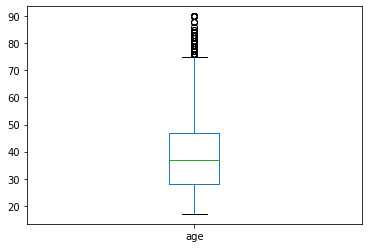

In [ ]:
data['age'].plot.box()


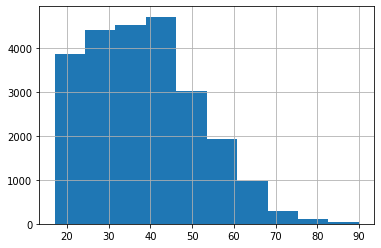

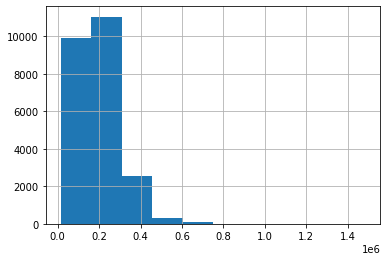

In [ ]:
plt.show(data['age'].hist())
plt.show(data['fnlwgt'].hist())

In [ ]:
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(data_n)
test_norm = scaler.transform(test_n)

#print(data_norm)
#print(test_norm)

In [ ]:
print(data_norm.shape)
print(test_norm.shape)

(23884, 6)
(16280, 6)


In [ ]:
data_X = np.concatenate((data_transformed, data_norm), axis=1)
test_X = np.concatenate((test_transformed, test_norm), axis=1)


In [ ]:
print(data_X.shape)
print(test_X.shape)

(23884, 104)
(16280, 104)


In [ ]:
print(data_X[0])
print(test_X[0])

[0.         0.         0.         0.         1.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.         0.         0.         0.         0.
 0.         0.         0.         1.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.         0.         1.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.
 0.         0.         0.45205479 0.04655854 0.8        

In [ ]:
data_X[0:100]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.12244898],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.39795918],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.39795918],
       ...,
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.39795918],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.39795918],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.39795918]])

In [ ]:
data_X.shape

(23884, 104)

In [ ]:
p = data_X[0:1000]
p.shape

(1000, 104)

In [ ]:
q = data_X[1434:4256]
q.shape

(2822, 104)

## Preprocess y


In [ ]:
k = np.concatenate((p, q), axis = 0)

In [ ]:
k.shape

(3822, 104)

In [ ]:
# label " <=50K" as 0 and " >50K" as 1
data_y = [0 if e == ' <=50K' else 1 for e in data['salary']]
test_y = [0 if e == ' <=50K.' else 1 for e in test['salary']]

In [ ]:

import pandas as pd
import numpy as np

In [ ]:
names = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                   'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                   'Normal Nucleoli', 'Mitoses', 'Class']

data = pd.read_csv("breast-cancer-wisconsin.data",
                  names=names)
data = data.replace(to_replace="?", value=np.NaN)
data = data.dropna()
data['Bare Nuclei'] = data['Bare Nuclei'].astype('int')
x = np.array(data.iloc[:, 1:10])
y = np.array(data.iloc[:, 10:])
y = y.reshape(-1, )
y[y==4] = 1
y[y==2] = 0

In [ ]:
data

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
from sklearn.model_selection import train_test_split
attributes = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                   'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                   'Normal Nucleoli', 'Mitoses']
X = data[attributes]
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=10, shuffle = True)

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
# 580 training, 103 testing

(580, 10) (103, 10)
(580,) (103,)


In [ ]:
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(X_train)
test_norm = scaler.transform(X_test)

In [ ]:
print(data_norm[0])
print(test_norm[0])

[0.05944114 0.77777778 1.         1.         0.66666667 1.
 1.         0.66666667 0.22222222 0.77777778]
[0.03479612 1.         1.         1.         1.         1.
 1.         0.33333333 1.         1.        ]


## Cross validation 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
def k_foldCV(data_X, data_Y, classifier, k=5, percent_use = 1):
  

  used_num = int(len(data_X) * percent_use)
  print("num of total data entries: {}".format(len(data_X)))
  print("num of data used: {}".format(used_num))
  # print("num of total data entries: {}".format(len(data_X))
  # print("num of data used: {} ".format(used_num))

  data_x = data_X[:used_num]
  data_y = data_Y[:used_num]

  start = 0
  data_size = len(data_x) // k
  best_score = 0
  lowest_score = 999
  avg = 0
  print("model: {}".format(classifier))
  ## split the data into k sets
  for i in range(k):
    if i == 0:
      validation_x = data_x[0:data_size]
      validation_y = data_y[0:data_size]
      training_x = data_x[data_size:]
      training_y = data_y[data_size:]
      print("fold 1 starts:")
      
      classifier.fit(training_x, training_y)
      cur_score = classifier.score(validation_x, validation_y)
      
      print("fold 1 score: ", cur_score)
      best_score = max(best_score, cur_score)
      lowest_score = min(lowest_score, cur_score)
      start += data_size
      avg += cur_score
      print("_______________________________________")
    elif i != 0 and i != k-1:
      validation_x = data_x[start:start + data_size]
      validation_y = data_y[start:start + data_size]
      training_x = np.concatenate((data_x[0:start], data_x[start+data_size:]), axis = 0)
      training_y = np.concatenate((data_y[0:start], data_y[start+data_size:]), axis = 0) 
      print("fold {} starts:".format(i+1))
      classifier.fit(training_x, training_y)
      cur_score = classifier.score(validation_x, validation_y)
      print("fold {} score: ".format(i+1), cur_score)
      best_score = max(best_score, cur_score)
      lowest_score = min(lowest_score, cur_score)
      start += data_size
      avg += cur_score
      print("_______________________________________")
    else:
      validation_x = data_x[start:]
      validation_y = data_y[start:]
      training_x = data_x[0:start]
      training_y = data_y[0:start]
      print("fold {} starts:".format(i+1))
      classifier.fit(training_x, training_y)
      cur_score = classifier.score(validation_x, validation_y)
      print("fold {} score: ".format(i+1), cur_score)
      best_score = max(best_score, cur_score)
      lowest_score = min(lowest_score, cur_score)
      avg += cur_score
      print("_______________________________________")
  avg = avg / k
  print("CV complete")
  print("best_score is:", best_score)
  print("lowest_score is:", lowest_score)
  print("avg score is:", avg)
  return avg







In [ ]:

max_depth_params = [i for i in range(1, 101, 5)]
criterion_params = ["gini", "entropy"]
min_samples_split = [i for i in range(2, 102, 5)]

def DT_GridsearchCV(max_depth_params, criterion_params, min_samples_split, classifier, data_x, data_y):
  best_params = []
  best_score = 0
  counter = 1
  for depth in max_depth_params:
    for crit in criterion_params:
      for num_sample_split in min_samples_split:
        print("sample {} starts".format(counter))
        cur_params = [depth, crit, num_sample_split]
        dtree_clf = classifier(criterion = crit,
                               max_depth = depth,
                               min_samples_split = num_sample_split)
        print("testing params: depth={}, criterion={}, min_samples_split={}".format(crit,
                                                                                    depth,
                                                                                    num_sample_split))
        
        score = k_foldCV(data_x, data_y, dtree_clf, k=3)
        print("sample {} score is ".format(score))
        if score >= best_score:
          
          best_score = score 
          best_params = cur_params
        print("_________________________________")
        counter += 1
  print("best params are: depth = {}, crit = {}, min_sample_split = {}, with_score= {}".format(best_params[0], best_params[1], best_params[2], best_score))
  return best_params, best_score

  #




##Grid Search


In [ ]:

max_depth_params = [i for i in range(1, 101, 10)]
criterion_params = ["gini", "entropy"]
min_samples_split = [i for i in range(2, 102, 10)]
min_samples_leaf = [i for i in range(1, 101, 10)]


def DT_GridsearchCV(max_depth_params, criterion_params, min_samples_split, min_samples_leaf, classifier, data_x, data_y):
  best_params = []
  best_score = 0
  counter = 1
  all_params_and_score = []
  for depth in max_depth_params:
    for crit in criterion_params:
      for num_sample_split in min_samples_split:
        for min_leaf in min_samples_leaf:
          print("sample {} starts".format(counter))
          cur_params = [depth, crit, num_sample_split, min_leaf]
          dtree_clf = classifier(criterion = crit,
                                max_depth = depth,
                                min_samples_split = num_sample_split,
                                 min_samples_leaf = min_leaf 
                                 )
          print("testing params: depth={}, criterion={}, min_samples_split={}, min_samples_leaf={}".format(crit,
                                                                                      depth,
                                                                                      num_sample_split, min_leaf))
          
          score = k_foldCV(data_x, data_y, dtree_clf, k=3)
          print("sample {} score is ".format(score))
          cur_score = [depth, crit, num_sample_split,min_leaf, score]
          all_params_and_score.append(cur_score)
          if score >= best_score:
            
            best_score = score 
            best_params = cur_params
          print("_________________________________")
          counter += 1
  print("best params are: depth = {}, crit = {}, min_sample_split = {}, min_samples_leaf = {},  with_score= {}".format(best_params[0], best_params[1], best_params[2], best_params[3], best_score))
  return best_params, best_score, all_params_and_score

  #


In [ ]:
print(max_depth_params)
print(criterion_params)
print(min_samples_split)
print(min_samples_leaf) 

[1, 11, 21, 31, 41, 51, 61, 71, 81, 91]
['gini', 'entropy']
[2, 12, 22, 32, 42, 52, 62, 72, 82, 92]
[1, 11, 21, 31, 41, 51, 61, 71, 81, 91]


In [ ]:
# best_params, best_score, all_params_and_score = DT_GridsearchCV(max_depth_params, criterion_params, min_samples_split, min_samples_leaf,DecisionTreeClassifier,data_X, data_y)

In [ ]:
#all_params_and_score

In [ ]:
#len(all_params_and_score)

In [ ]:
# np.savetxt("resultsDT.csv", all_params_and_score, delimiter=',')

In [ ]:
#all_params_and_score = np.array(all_params_and_score)

##Sample growing subsets of the training/validation data

In [ ]:
def percent_data_vs_score(data_X, data_y, classifier, percent):
  score_list = []
  for num in percent:
    score = k_foldCV(data_X, data_y, classifier, 5, percent_use=num)
    score_list.append(score)
  return score_list

###KNN

In [ ]:
#The best accuracy is 0.8296,given by the model with 29 neighbors and uniform weight method
adult_KNN = KNeighborsClassifier(n_neighbors=29)
adult_KNN = adult_KNN.fit(data_X, data_y)
percent = np.linspace(0.1, 1, 10)

adult_KNN_score_list = percent_data_vs_score(data_X, data_y, adult_KNN, percent)

num of total data entries: 23884
num of data used: 2388
model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                     weights='uniform')
fold 1 starts:
fold 1 score:  0.8238993710691824
_______________________________________
fold 2 starts:
fold 2 score:  0.8427672955974843
_______________________________________
fold 3 starts:
fold 3 score:  0.8155136268343816
_______________________________________
fold 4 starts:
fold 4 score:  0.8322851153039832
_______________________________________
fold 5 starts:
fold 5 score:  0.8333333333333334
_______________________________________
CV complete
best_score is: 0.8427672955974843
lowest_score is: 0.8155136268343816
avg score is: 0.829559748427673
num of total data entries: 23884
num of data used: 4776
model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, 

KeyboardInterrupt: ignored

###decision tree

In [ ]:
#max depth equal to 11, min sample spliteuqal to 42, min samples leaf equal to 11, and entropy as criterion.
adult_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 11, min_samples_split = 42, min_samples_leaf = 11)
adult_tree = adult_tree.fit(data_X, data_y)
percent = np.linspace(0.1, 1, 10)

adult_DT_score_list = percent_data_vs_score(data_X, data_y, adult_tree, percent)

num of total data entries: 30161
num of data used: 3016
model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=42,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
fold 1 starts:
fold 1 score:  0.8076285240464345
_______________________________________
fold 2 starts:
fold 2 score:  0.8175787728026535
_______________________________________
fold 3 starts:
fold 3 score:  0.8159203980099502
_______________________________________
fold 4 starts:
fold 4 score:  0.8109452736318408
_______________________________________
fold 5 starts:
fold 5 score:  0.8327814569536424
_______________________________________
CV complete
best_score is: 0.8327814569536424
lowest_score is:

(0.7, 0.9)

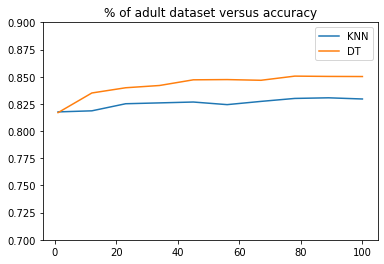

In [ ]:
plt.title("% of adult dataset versus accuracy")
x_axis = np.linspace(1, 100, 10)
plt.plot(x_axis, adult_KNN_score_list)
plt.plot(x_axis, adult_DT_score_list)
plt.legend(['KNN', 'DT'])
plt.ylim([0.7, 0.9])

# Breast Cancer Dataset

## Preprocessing

In [ ]:
names = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                   'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                   'Normal Nucleoli', 'Mitoses', 'Class']

data = pd.read_csv("breast-cancer-wisconsin.data",
                  names=names)
data = data.replace(to_replace="?", value=np.NaN)
data = data.dropna()
data['Bare Nuclei'] = data['Bare Nuclei'].astype('int')
x = np.array(data.iloc[:, 1:10])
y = np.array(data.iloc[:, 10:])
y = y.reshape(-1, )
y[y==4] = 1
y[y==2] = 0

In [ ]:
count = 0
for i in y:
  if i == 0:
    count +=1 
print(count)

444


In [ ]:
count = 0
for i in y:
  if i == 1:
    count +=1 
print(count)

239


In [ ]:
data

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
from sklearn.model_selection import train_test_split
attributes = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                   'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                   'Normal Nucleoli', 'Mitoses']
X = data[attributes]
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=10, shuffle = True)

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
# 580 training, 103 testing

(580, 10) (103, 10)
(580,) (103,)


In [ ]:

def k_foldCV_with_F1(data_X, data_Y, classifier, k=5, percent_use = 1):
  

  used_num = int(len(data_X) * percent_use)
  print("num of total data entries: {}".format(len(data_X)))
  print("num of data used: {}".format(used_num))
  # print("num of total data entries: {}".format(len(data_X))
  # print("num of data used: {} ".format(used_num))

  data_x = data_X[:used_num]
  data_y = data_Y[:used_num]

  start = 0
  data_size = len(data_x) // k
  best_score = 0
  lowest_score = 999
  avg_acc = 0
  avg_precision = 0
  avg_recall = 0
  avg_F1 = 0
  print("model: {}".format(classifier))
  ## split the data into k sets
  for i in range(k):
    if i == 0:
      validation_x = data_x[0:data_size]
      validation_y = data_y[0:data_size]
      training_x = data_x[data_size:]
      training_y = data_y[data_size:]
      print("fold 1 starts:")
      

      classifier.fit(training_x, training_y)
      cur_score = classifier.score(validation_x, validation_y)
      prediction_y = classifier.predict(validation_x)
      # validation_y
      
      F1_score = f1_score(validation_y, prediction_y)
      Precision = precision_score(validation_y, prediction_y)
      Recall = recall_score(validation_y, prediction_y)
      

      print("fold 1 score: ", cur_score)
      best_score = max(best_score, cur_score)
      lowest_score = min(lowest_score, cur_score)
      start += data_size
      avg_acc += cur_score
      avg_F1 += F1_score
      avg_precision += Precision 
      avg_recall += Recall
      print("_______________________________________")
    elif i != 0 and i != k-1:
      validation_x = data_x[start:start + data_size]
      validation_y = data_y[start:start + data_size]
      training_x = np.concatenate((data_x[0:start], data_x[start+data_size:]), axis = 0)
      training_y = np.concatenate((data_y[0:start], data_y[start+data_size:]), axis = 0) 
      print("fold {} starts:".format(i+1))


      classifier.fit(training_x, training_y)
      cur_score = classifier.score(validation_x, validation_y)
      prediction_y = classifier.predict(validation_x)
      # classifier.fit(training_x, training_y)
      # cur_score = classifier.score(validation_x, validation_y)
      # prediction_y = classifier.predict(validation_x)
      # validation_y
      
      F1_score = f1_score(validation_y, prediction_y)
      Precision = precision_score(validation_y, prediction_y)
      Recall = recall_score(validation_y, prediction_y)
      print("fold {} score: ".format(i+1), cur_score)
      best_score = max(best_score, cur_score)
      lowest_score = min(lowest_score, cur_score)
      start += data_size
      avg_acc += cur_score
      avg_F1 += F1_score
      avg_precision += Precision 
      avg_recall += Recall
      print("_______________________________________")
    else:
      validation_x = data_x[start:]
      validation_y = data_y[start:]
      training_x = data_x[0:start]
      training_y = data_y[0:start]
      print("fold {} starts:".format(i+1))

      classifier.fit(training_x, training_y)
      cur_score = classifier.score(validation_x, validation_y)
      prediction_y = classifier.predict(validation_x)
      # classifier.fit(training_x, training_y)
      # cur_score = classifier.score(validation_x, validation_y)
      # prediction_y = classifier.predict(validation_x)
      # validation_y
      
      F1_score = f1_score(validation_y, prediction_y)
      Precision = precision_score(validation_y, prediction_y)
      Recall = recall_score(validation_y, prediction_y)
      print("fold {} score: ".format(i+1), cur_score)
      best_score = max(best_score, cur_score)
      lowest_score = min(lowest_score, cur_score)
      avg_acc += cur_score
      avg_F1 += F1_score
      avg_precision += Precision 
      avg_recall += Recall
      print("_______________________________________")
  avg_acc = avg_acc / k
  avg_F1  = avg_F1 / k 
  avg_precision = avg_precision / k
  avg_recall = avg_recall / k
  print("CV complete")
  print("best_score is:", best_score)
  print("lowest_score is:", lowest_score)
  print("avg score is:", avg_acc)
  print("avg precision is:", avg_precision)
  print("avg recall is:", avg_recall)
  print("avg F1 is:", avg_F1)
  return avg_acc, avg_precision, avg_recall, avg_F1

In [ ]:
DT_clf = DecisionTreeClassifier(max_depth=11, criterion='entropy', min_samples_split=42,min_samples_leaf=11)
# best dTree for the first dataset


In [ ]:
# micro, macro 
DT_clf.fit(data_X, data_y)
pred_y = DT_clf.predict(test_X)


In [ ]:
k = classification_report(test_y, pred_y,output_dict=True)
k

{'0': {'f1-score': 0.9101223324200208,
  'precision': 0.874842347355145,
  'recall': 0.9483673797651601,
  'support': 12434},
 '1': {'f1-score': 0.649616368286445,
  'precision': 0.7707961442342021,
  'recall': 0.5613624544981799,
  'support': 3846},
 'accuracy': 0.856941031941032,
 'macro avg': {'f1-score': 0.7798693503532329,
  'precision': 0.8228192457946735,
  'recall': 0.7548649171316699,
  'support': 16280},
 'weighted avg': {'f1-score': 0.8485801986326909,
  'precision': 0.8502623905244848,
  'recall': 0.856941031941032,
  'support': 16280}}

In [ ]:
Knn_clf =  KNeighborsClassifier(n_neighbors=47, weights='uniform')
# best knn for the first data set

In [ ]:
Knn_clf.fit(data_X, data_y)
pred_y_knn = Knn_clf.predict(test_X)
k2 = classification_report(test_y, pred_y_knn, output_dict = True)
k2

{'0': {'f1-score': 0.8946063967898029,
  'precision': 0.875625721986908,
  'recall': 0.9144281807945954,
  'support': 12434},
 '1': {'f1-score': 0.6248424590393502,
  'precision': 0.6770864946889226,
  'recall': 0.5800832033281331,
  'support': 3846},
 'accuracy': 0.8354422604422604,
 'macro avg': {'f1-score': 0.7597244279145765,
  'precision': 0.7763561083379154,
  'recall': 0.7472556920613642,
  'support': 16280},
 'weighted avg': {'f1-score': 0.8308771520362255,
  'precision': 0.8287226588303938,
  'recall': 0.8354422604422604,
  'support': 16280}}

In [ ]:
 k_foldCV_with_F1(data_X, data_y, Knn_clf, k=5, percent_use = 1)

num of total data entries: 23884
num of data used: 23884
model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=47, p=2,
                     weights='uniform')
fold 1 starts:
fold 1 score:  0.8241206030150754
_______________________________________
fold 2 starts:
fold 2 score:  0.830820770519263
_______________________________________
fold 3 starts:
fold 3 score:  0.8257956448911222
_______________________________________
fold 4 starts:
fold 4 score:  0.8327051926298158
_______________________________________
fold 5 starts:
fold 5 score:  0.8389121338912134
_______________________________________
CV complete
best_score is: 0.8389121338912134
lowest_score is: 0.8241206030150754
avg score is: 0.830470868989298
avg precision is: 0.6879483766307892
avg recall is: 0.575582390888312
avg F1 is: 0.6266486529431872


(0.830470868989298, 0.6879483766307892, 0.575582390888312, 0.6266486529431872)

In [ ]:
 k_foldCV_with_F1(data_X, data_y, DT_clf, k=5, percent_use = 1)
 

num of total data entries: 23884
num of data used: 23884
model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=42,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
fold 1 starts:
fold 1 score:  0.8417085427135679
_______________________________________
fold 2 starts:
fold 2 score:  0.8517587939698492
_______________________________________
fold 3 starts:
fold 3 score:  0.8505025125628141
_______________________________________
fold 4 starts:
fold 4 score:  0.8536432160804021
_______________________________________
fold 5 starts:
fold 5 score:  0.8543933054393306
_______________________________________
CV complete
best_score is: 0.8543933054393306
lowest_score is

(0.8504012741531927,
 0.7655865041804016,
 0.5718345044486546,
 0.6537342037413836)

## Decision tree max depth 1 - 101

In [ ]:
max_depth_params = [i for i in range(1,101, 10)]
criterion_params = ["gini", "entropy"]
min_samples_split = [i for i in range(2, 102, 10)]
min_samples_leaf = [i for i in range(1, 101, 10)]


def DT_GridsearchCV(max_depth_params, criterion_params, min_samples_split, min_samples_leaf, classifier, data_x, data_y):
  best_params = []
  best_score = 0
  counter = 1
  all_params_and_score = []
  for depth in max_depth_params:
    for crit in criterion_params:
      for num_sample_split in min_samples_split:
        for min_leaf in min_samples_leaf:
          cur_params = [depth, crit, num_sample_split, min_leaf]
          dtree_clf = classifier(criterion = crit,
                                max_depth = depth,
                                min_samples_split = num_sample_split,
                                 min_samples_leaf = min_leaf 
                                 )
         
          score = k_foldCV(data_x, data_y, dtree_clf, k=3)
          cur_score = [depth, crit, num_sample_split,min_leaf, score]
          all_params_and_score.append(cur_score)
          if score >= best_score:
            
            best_score = score 
            best_params = cur_params
          counter += 1
  print("best params are: depth = {}, crit = {}, min_sample_split = {}, min_samples_leaf = {},  with_score= {}".format(best_params[0], best_params[1], best_params[2], best_params[3], best_score))
  return best_params, best_score, all_params_and_score

In [ ]:
best_params, best_score, all_params_and_score = DT_GridsearchCV(max_depth_params, criterion_params, min_samples_split, min_samples_leaf,DecisionTreeClassifier, X_train, y_train)

best params are: depth = 31, crit = entropy, min_sample_split = 2, min_samples_leaf = 1,  with_score= 0.9500293787725015


In [ ]:
all_params_and_score = np.array(all_params_and_score)
all_params_and_score_df = pd.DataFrame(all_params_and_score, columns=['max_depth_params', 'criterion_params', 'min_samples_split', 'min_samples_leaf', 'f1_score'])
all_params_and_score_df.to_csv("bc_result.csv")

In [ ]:
print(max_depth_params)
print(criterion_params)
print(min_samples_split)
print(min_samples_leaf)

[1, 11, 21, 31, 41, 51, 61, 71, 81, 91]
['gini', 'entropy']
[2, 12, 22, 32, 42, 52, 62, 72, 82, 92]
[1, 11, 21, 31, 41, 51, 61, 71, 81, 91]


In [ ]:
bc_result = pd.read_csv('bc_result.csv')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
gini = bc_result.loc[bc_result['criterion_params'] == 'gini']
entropy = bc_result.loc[bc_result['criterion_params'] == 'entropy']
gini_modified = gini[:]
gini_modified = gini_modified.drop(gini_modified[gini_modified['max_depth_params'] == 1].index)
entropy_modified = entropy[:]
entropy_modified = entropy_modified.drop(entropy_modified[entropy_modified['max_depth_params'] == 1].index)

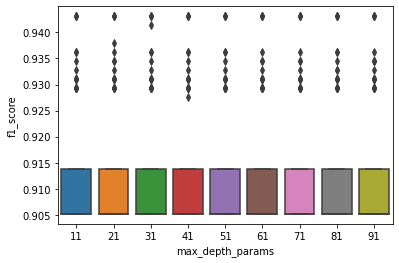

In [ ]:
sns.boxplot( x=gini_modified["max_depth_params"], y=gini_modified["f1_score"],showfliers = True);

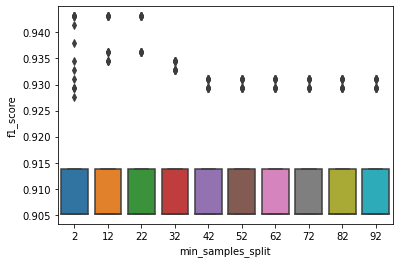

In [ ]:
sns.boxplot( x=gini_modified["min_samples_split"], y=gini_modified["f1_score"],showfliers = True);

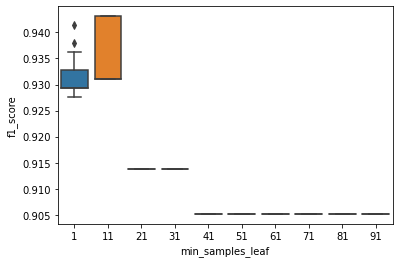

In [ ]:
sns.boxplot( x=gini_modified["min_samples_leaf"], y=gini_modified["f1_score"],showfliers = True);

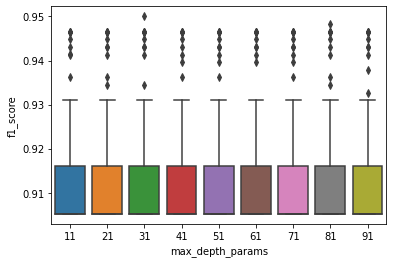

In [ ]:
sns.boxplot( x=entropy_modified["max_depth_params"], y=entropy_modified["f1_score"],showfliers = True);

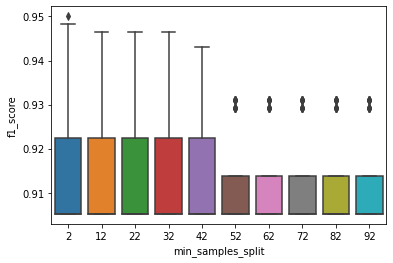

In [ ]:
sns.boxplot( x=entropy_modified["min_samples_split"], y=entropy_modified["f1_score"],showfliers = True)

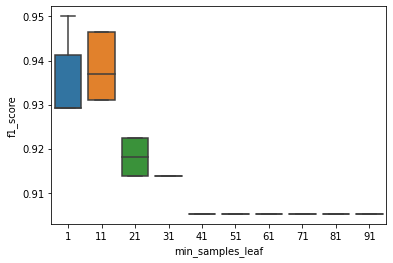

In [ ]:
sns.boxplot( x=entropy_modified["min_samples_leaf"], y=entropy_modified["f1_score"],showfliers = True);

## Decision tree max depth 2 - 11

In [ ]:
max_depth_params = [i for i in range(2,12)]
criterion_params = ["gini", "entropy"]
min_samples_split = [i for i in range(2, 102, 10)]
min_samples_leaf = [i for i in range(1, 101, 10)]

In [ ]:
best_params, best_score, all_params_and_score = DT_GridsearchCV(max_depth_params, criterion_params, min_samples_split, min_samples_leaf,DecisionTreeClassifier, X_train, y_train)

best params are: depth = 9, crit = entropy, min_sample_split = 2, min_samples_leaf = 1,  with_score= 0.946592952655663


In [ ]:
all_params_and_score = np.array(all_params_and_score)
all_params_and_score_df = pd.DataFrame(all_params_and_score, columns=['max_depth_params', 'criterion_params', 'min_samples_split', 'min_samples_leaf', 'f1_score'])
all_params_and_score_df.to_csv("bc_result_2.csv")
bc_result2 = pd.read_csv('bc_result_2.csv')
gini = bc_result.loc[bc_result2['criterion_params'] == 'gini']
entropy = bc_result.loc[bc_result2['criterion_params'] == 'entropy']
gini_modified = gini[:]
gini_modified = gini_modified.drop(gini_modified[gini_modified['max_depth_params'] == 1].index)
entropy_modified = entropy[:]
entropy_modified = entropy_modified.drop(entropy_modified[entropy_modified['max_depth_params'] == 1].index)

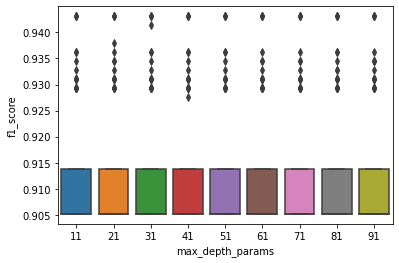

In [ ]:
sns.boxplot( x=gini_modified["max_depth_params"], y=gini_modified["f1_score"],showfliers = True);

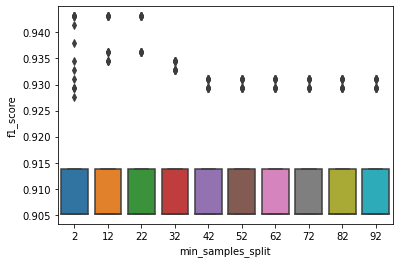

In [ ]:
sns.boxplot( x=gini_modified["min_samples_split"], y=gini_modified["f1_score"],showfliers = True);

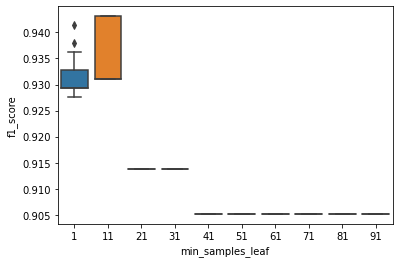

In [ ]:
sns.boxplot( x=gini_modified["min_samples_leaf"], y=gini_modified["f1_score"],showfliers = True);

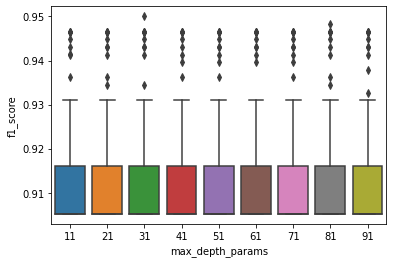

In [ ]:
sns.boxplot( x=entropy_modified["max_depth_params"], y=entropy_modified["f1_score"],showfliers = True);

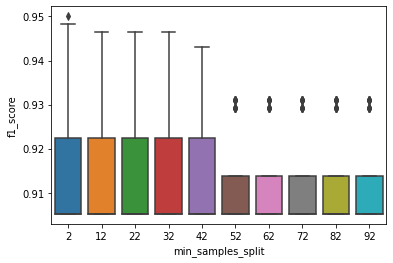

In [ ]:
sns.boxplot( x=entropy_modified["min_samples_split"], y=entropy_modified["f1_score"],showfliers = True);

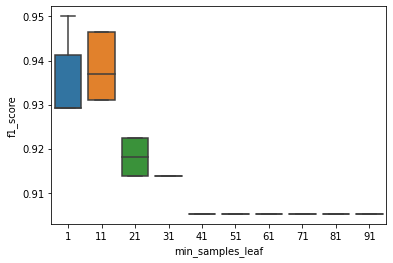

In [ ]:
sns.boxplot( x=entropy_modified["min_samples_leaf"], y=entropy_modified["f1_score"],showfliers = True);

## KNN


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=2)

In [ ]:
weights = ['uniform', 'distance']
max_n_neighbours = 50
def KNN_gridsearchCV(weights, max_n_neighbours, classifier, data_X, data_y, percent_use):
  res = []
  best_score = 0
  best_neigh = 0
  best_w = 'temp'
  count = 1
  for i in range(2, max_n_neighbours, 1):
    for w in weights:
      print("trial {} starts:".format(count))
      neigh = classifier(n_neighbors=i, weights=w)
      score = k_foldCV(data_X, data_y, neigh, k=3, percent_use = percent_use)
      res.append([i, w, score])
      count += 1
      if score >= best_score:
        best_score = score
        best_neigh = i
        best_w = w
      
  print("best_score is : {}".format(best_score))
  print("best_selected_neighbour is {}".format(best_neigh))
  print('best weight method is {}'.format(best_w))
  return best_score, best_neigh, best_w, res


In [ ]:
best_score, best_neigh, best_w, KNN_res_arr = KNN_gridsearchCV(weights, max_n_neighbours, KNeighborsClassifier, X_train, y_train, percent_use =0.8)

In [ ]:
KNN_res_arr = np.array(KNN_res_arr)
KNN_res_arr

In [ ]:
KNN_res_arr_df = pd.DataFrame(KNN_res_arr, columns=['num_neighbours', 'weighted_method', 'accuracy'])
KNN_res_arr_df.to_csv("KNN_res_bc.csv")

In [ ]:
knn_bc = pd.read_csv('KNN_res_bc.csv')
knn_bc = knn_bc.drop(['Unnamed: 0'], axis = 1)

In [ ]:
knn_bc

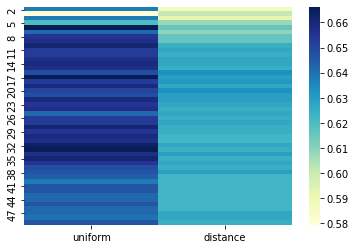

In [ ]:
Index= list(range(2,50))
Cols = ['uniform', 'distance']
df = pd.DataFrame(knn_bc['accuracy'].to_numpy().reshape(48,2), index=Index, columns=Cols)
sns.heatmap(df,cmap="YlGnBu")

In [ ]:

all_params_and_score_df = pd.DataFrame(all_params_and_score, columns=['max_depth_params', 'criterion_params', 'min_samples_split', 'min_samples_leaf', 'accuracy'])

In [ ]:
all_params_and_score_df.to_csv("all_params_and_accDT.csv")

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
# for i in range(10):
#   k_foldCV(data_X, data_Y, neigh, k=5, percent_use = 0.1):
# neigh.fit(data_X, data_y)
k_foldCV(data_X, data_y, neigh, k=5, percent_use = 1)

In [ ]:
KNeighborsClassifier?


In [ ]:
weights = ['uniform', 'distance']
max_n_neighbours = 50
def KNN_gridsearchCV(weights, max_n_neighbours, classifier, data_X, data_y, percent_use):
  res = []
  best_score = 0
  best_neigh = 0
  best_w = 'temp'
  count = 1
  for i in range(2, max_n_neighbours, 1):
    for w in weights:
      print("trial {} starts:".format(count))
      neigh = classifier(n_neighbors=i, weights=w)
      score = k_foldCV(data_X, data_y, neigh, k=3, percent_use = percent_use)
      res.append([i, w, score])
      count += 1
      if score >= best_score:
        best_score = score
        best_neigh = i
        best_w = w
      
  print("best_score is : {}".format(best_score))
  print("best_selected_neighbour is {}".format(best_neigh))
  print('best weight method is {}'.format(best_w))
  return best_score, best_neigh, best_w, res

  

In [ ]:
best_score, best_neigh, best_w, KNN_res_arr = KNN_gridsearchCV(weights, max_n_neighbours, KNeighborsClassifier, data_X, data_y, percent_use =0.8)

trial 1 starts:
num of total data entries: 30161
num of data used: 24128
model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')
fold 1 starts:
fold 1 score:  0.7984332255657797
_______________________________________
fold 2 starts:
fold 2 score:  0.8051479731410097
_______________________________________
fold 3 starts:
fold 3 score:  0.796494281452014
_______________________________________
CV complete
best_score is: 0.8051479731410097
lowest_score is: 0.796494281452014
avg score is: 0.8000251600529346
trial 2 starts:
num of total data entries: 30161
num of data used: 24128
model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='distance')
fold 1 starts:
fold 1 score:  0.7826411340462571
____________________________________

In [ ]:
KNN_res_arr = np.array(KNN_res_arr)
KNN_res_arr

array([['2', 'uniform', '0.8000251600529346'],
       ['2', 'distance', '0.7848144168360595'],
       ['3', 'uniform', '0.8098059528598677'],
       ['3', 'distance', '0.8017241077250121'],
       ['4', 'uniform', '0.8150281839174106'],
       ['4', 'distance', '0.8050810899004328'],
       ['5', 'uniform', '0.817721909008041'],
       ['5', 'distance', '0.8094327979664856'],
       ['6', 'uniform', '0.8200843610989265'],
       ['6', 'distance', '0.8122095654535056'],
       ['7', 'uniform', '0.8220321783205716'],
       ['7', 'distance', '0.8140332725262652'],
       ['8', 'uniform', '0.825347927854151'],
       ['8', 'distance', '0.8156080379103688'],
       ['9', 'uniform', '0.8241459051400666'],
       ['9', 'distance', '0.8169758156385424'],
       ['10', 'uniform', '0.8254723162538063'],
       ['10', 'distance', '0.8185922052766816'],
       ['11', 'uniform', '0.82468484596429'],
       ['11', 'distance', '0.8193382883405961'],
       ['12', 'uniform', '0.8260524794142867'],
  

In [ ]:
KNN_res_arr_df = pd.DataFrame(KNN_res_arr, columns=['num_neighbours', 'weighted_method', 'accuracy'])
KNN_res_arr_df.to_csv("KNN_res_df.csv")

In [ ]:
print(neigh.score(data_X, data_y))
print(neigh.score(test_X, test_y))
res = []
best_score = 0
best_neigh = 0
weight = ['uniform', 'distance']
for i in range(2, 51, 1):
  neigh = KNeighborsClassifier(n_neighbors=i)
  score = k_foldCV(data_X, data_y, neigh, k=5, percent_use = 0.8)
  res.append(score)
  if score >= best_score:
    best_score = score
    best_neigh = i
print("best_score is : {}".format(best_score))
print("beset_selected_neighbour is {}".format(best_neigh))



##Sample growing subsets of the training/validation data

###KNN

In [ ]:
#neighbor = 17, uniform
bc_KNN = KNeighborsClassifier(n_neighbors=17)
bc_KNN = bc_KNN.fit(data_X, data_y)
percent = np.linspace(0.1, 1, 10)

bc_KNN_score_list = percent_data_vs_score(data_X, data_y, bc_KNN, percent)

num of total data entries: 30161
num of data used: 3016
model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')
fold 1 starts:
fold 1 score:  0.8374792703150912
_______________________________________
fold 2 starts:
fold 2 score:  0.8208955223880597
_______________________________________
fold 3 starts:
fold 3 score:  0.8159203980099502
_______________________________________
fold 4 starts:
fold 4 score:  0.8374792703150912
_______________________________________
fold 5 starts:
fold 5 score:  0.7963576158940397
_______________________________________
CV complete
best_score is: 0.8374792703150912
lowest_score is: 0.7963576158940397
avg score is: 0.8216264153844464
num of total data entries: 30161
num of data used: 6032
model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None,

###Decision tree

In [ ]:
#The highest f1-score is 0.9465,  given by the model with depth equal to 91,  min sample splitequal tp 32, min samples leaf equal to 11, and entropy as criterion
bc_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 91, min_samples_split = 32, min_samples_leaf = 11)
bc_tree = bc_tree.fit(data_X, data_y)
percent = np.linspace(0.1, 1, 10)

bc_DT_score_list = percent_data_vs_score(data_X, data_y, bc_tree, percent)

num of total data entries: 30161
num of data used: 3016
model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=91, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=32,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
fold 1 starts:
fold 1 score:  0.8291873963515755
_______________________________________
fold 2 starts:
fold 2 score:  0.8192371475953566
_______________________________________
fold 3 starts:
fold 3 score:  0.8275290215588723
_______________________________________
fold 4 starts:
fold 4 score:  0.8076285240464345
_______________________________________
fold 5 starts:
fold 5 score:  0.8327814569536424
_______________________________________
CV complete
best_score is: 0.8327814569536424
lowest_score is:

(0.7, 0.9)

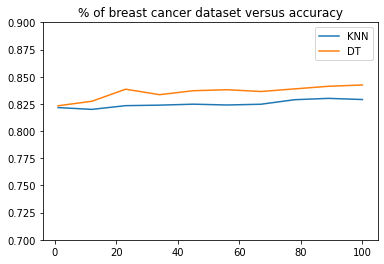

In [ ]:
plt.title("% of breast cancer dataset versus accuracy")
x_axis = np.linspace(1, 100, 10)
plt.plot(x_axis, bc_KNN_score_list)
plt.plot(x_axis, bc_DT_score_list)
plt.legend(['KNN', 'DT'])
plt.ylim([0.7, 0.9])